In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from loadTDMS import *
from tqdm import tqdm

## CuttingのRawData調べ

In [52]:
date = 20220120
# date = 20221027
num = 30
# path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
# npath = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Non-Cutting\Dynamo_{num}.tdms"

path = rf"Z:\100 Raw_data\20211115---切削実験\Dynamometer\1-5000\Dynamometer_38.tdms"
npath = rf"Z:\100 Raw_data\20211115---切削実験\Dynamometer\1-5000\Dynamometer_39.tdms"

c_d = load_tdms(path, ch_num=3)
nc_d = load_tdms(npath, ch_num=3)

In [53]:
len(c_d[1])

5205610

In [54]:
%matplotlib qt
plt.figure()
# plt.plot((c_d[1] - np.average(nc_d[1])) * -500)
plt.plot(c_d[1])

In [10]:
def get_average(num, cutting_avg):
    date = 20221027
    path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
    c_d = load_tdms(path, ch_num=3)
    a = np.array(c_d[1])
    cutting_avg.append(np.average(a))

In [14]:
cutting_avg = []
for i in tqdm(range(1,170)):
    get_average(i, cutting_avg)

100%|██████████| 169/169 [01:57<00:00,  1.44it/s]


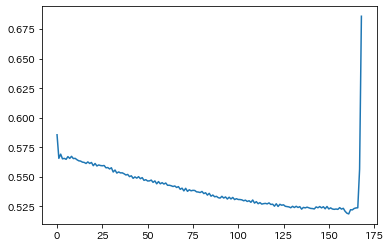

In [22]:
%matplotlib inline
cutting_avg = np.array(cutting_avg)
plt.plot(cutting_avg)

## Non-Cuttingの平均電圧調べ

In [42]:
# %matplotlib qt
date = 20221027
num = 165
path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Non-Cutting\Dynamo_{num}.tdms"
c_d = load_tdms(path, ch_num=3)

# plt.hlines(np.average(c_d[1]),xmin =c_d[1][0], xmax= c_d[1][-1], color="red", lineWidth=5)
print(len(c_d[1])/333333)

1.9763449763449763


In [5]:
def get_average(num, non_cutting_avg):
    date = 20221027
    path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Non-Cutting\Dynamo_{num}.tdms"
    c_d = load_tdms(path, ch_num=3)
    a = np.array(c_d[1])
    non_cutting_avg.append(np.average(a))

In [6]:
non_cutting_avg = []
for i in tqdm(range(1,170)):
    get_average(i, non_cutting_avg)

100%|██████████| 169/169 [00:28<00:00,  5.99it/s]


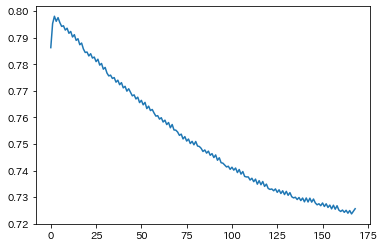

In [9]:
%matplotlib inline
plt.plot(non_cutting_avg)

In [ ]:
df = pd.DataFrame(non_cutting_avg, columns=["voltage_avg"])
df.index = df.index + 1
# df.to_csv(rf'Z:\200 Produced_data\20221027\CF\non-cuting-volatage-avg.csv')

In [ ]:
# a = pd.read_csv(rf'Z:\200 Produced_data\20221027\CF\non-cuting-volatage-avg.csv')
a['voltage_avg'].describe()

## cutting_avg ー non-cutting_avg　推移見る

In [ ]:
date = 20220120
path = rf"Z:\100 Raw_data\20211115---切削実験\Dynamometer\1-5000\Dynamometer_38.tdms"
npath = rf"Z:\100 Raw_data\20211115---切削実験\Dynamometer\1-5000\Dynamometer_39.tdms"
c_d = load_tdms(path, ch_num=3)
nc_d = load_tdms(npath, ch_num=3)

In [60]:
def get_average_both(num, ca, nca):
    date = 20221027
    path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
    npath = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Non-Cutting\Dynamo_{num}.tdms"
    c_d = load_tdms(path, ch_num=3)
    nc_d = load_tdms(npath, ch_num=3)
    c_d = np.average(np.array(c_d[1][:4930000]))
    nc_d = np.average(np.array(nc_d[1]))
    ca.append(c_d)
    nca.append(nc_d)
#     ca = np.append(ca,c_d)
#     nca = np.append(nca,nc_d)

In [61]:
ca = []
nca = []
# ca = np.array([])
# nca = np.array([])
for i in tqdm(range(1,169)):
    get_average_both(i, ca, nca)

100%|██████████| 168/168 [02:14<00:00,  1.25it/s]


In [63]:
ca = np.array(ca)
nca = np.array(nca)

np.save(rf"Z:\200 Produced_data\20221027\CF\cutting_avg",ca)
np.save(rf"Z:\200 Produced_data\20221027\CF\non-cutting_avg",nca)

In [64]:
ca = np.load(rf"Z:\200 Produced_data\20221027\CF\cutting_avg.npy")
nca = np.load(rf"Z:\200 Produced_data\20221027\CF\non-cutting_avg.npy")

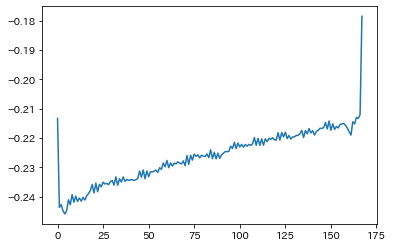

In [78]:
plt.plot((ca- nca))


In [88]:
def get_minmax(num, cmi, ncmi, cma, ncma):
    date = 20221027
    path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
    npath = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Non-Cutting\Dynamo_{num}.tdms"
    c_d = load_tdms(path, ch_num=3)
    nc_d = load_tdms(npath, ch_num=3)
    mi = np.min(np.array(c_d[1][:4930000]))
    nmi = np.min(np.array(nc_d[1]))
    cmi.append(mi)
    ncmi.append(nmi)
    
    ma = np.max(np.array(c_d[1][:4930000]))
    nma = np.max(np.array(nc_d[1]))
    cma.append(ma)
    ncma.append(nma)

In [89]:
cmi = []
ncmi = []
cma = []
ncma = []

for i in tqdm(range(1,169)):
    get_minmax(i, cmi, ncmi, cma, ncma)

100%|██████████| 168/168 [02:16<00:00,  1.23it/s]


In [98]:
cmi = np.array(cmi)
ncmi = np.array(ncmi)
cma = np.array(cma)
ncma = np.array(ncma)

np.save(rf"Z:\200 Produced_data\20221027\CF\cutting_min",cmi)
np.save(rf"Z:\200 Produced_data\20221027\CF\non-cutting_min",ncmi)
np.save(rf"Z:\200 Produced_data\20221027\CF\cutting_max",cma)
np.save(rf"Z:\200 Produced_data\20221027\CF\non-cutting_max",ncma)

In [99]:
cmi = np.load(rf"Z:\200 Produced_data\20221027\CF\cutting_min.npy")
ncmi = np.load(rf"Z:\200 Produced_data\20221027\CF\non-cutting_min.npy")

cma = np.load(rf"Z:\200 Produced_data\20221027\CF\cutting_max.npy")
ncma = np.load(rf"Z:\200 Produced_data\20221027\CF\non-cutting_max.npy")

In [147]:
# plt.plot(cma)
# plt.plot(nca)

w_size = 10
x = np.linspace(-1,1,w_size)
v = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)
v = v / np.sum(v)
v = np.sort(v)[::-1]

cf = np.convolve(((cmi-cma)*-500),v, mode='valid')

# plt.plot((cmi - cma)*-500)
plt.plot(cf)

In [ ]:
def get_min(num, cmi):
    date = 20221027
    path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
    c_d = load_tdms(path, ch_num=3)
    mi = np.min(np.array(c_d[1][:4930000]))
    cmi.append(mi)


In [142]:
%%time
date = 20221027
path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_1.tdms"
c_d1 = load_tdms(path, ch_num=3)
c_d1 = c_d1[1][:4930000]

for i in range(2,10):
    path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{i}.tdms"
    c_d = load_tdms(path, ch_num=3)
    c_d = c_d[1][:4930000]
    c_d1 = np.concatenate([c_d1, c_d], axis=0)

for j in tqdm(range(1,15)):
    for i in range(j*10,j*10+10):
        path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{i}.tdms"
        c_d = load_tdms(path, ch_num=3)
        c_d = c_d[1][:4930000]
        c_d1 = np.concatenate([c_d1, c_d], axis=0)

100%|██████████| 14/14 [01:52<00:00,  8.02s/it]

Wall time: 1min 55s


In [11]:
%%time
date = 20221027


for i in tqdm(range(2,17)):
    c_d1 = np.array([])
    for num in range((i-1)*10+1,(i-1)*10 +11):
        print(num)
        path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
        c_d = load_tdms(path, ch_num=3)
        c_d = c_d[1][:4930000]
        c_d1 = np.concatenate([c_d1, c_d], axis=0)
    np.save(rf"Z:\200 Produced_data\20221027\CF\chunk\{(i-1)*10+1}-{(i-1)*10 +10}",c_d1)

  0%|          | 0/15 [00:00<?, ?it/s]

11
12
13
14
15
16
17
18
19
20


  7%|▋         | 1/15 [00:15<03:38, 15.61s/it]

21
22
23
24
25
26
27
28
29
30


 13%|█▎        | 2/15 [00:30<03:19, 15.33s/it]

31
32
33
34
35
36
37
38
39
40


 20%|██        | 3/15 [00:45<03:03, 15.26s/it]

41
42
43
44
45
46
47
48
49
50


 27%|██▋       | 4/15 [00:59<02:45, 15.05s/it]

51
52
53
54
55
56
57
58
59
60


 33%|███▎      | 5/15 [01:15<02:31, 15.13s/it]

61
62
63
64
65
66
67
68
69
70


 40%|████      | 6/15 [01:29<02:15, 15.01s/it]

71
72
73
74
75
76
77
78
79
80


 47%|████▋     | 7/15 [01:44<01:58, 14.80s/it]

81
82
83
84
85
86
87
88
89
90


 53%|█████▎    | 8/15 [02:02<01:49, 15.70s/it]

91
92
93
94
95
96
97
98
99
100


 60%|██████    | 9/15 [02:16<01:32, 15.39s/it]

101
102
103
104
105
106
107
108
109
110


 67%|██████▋   | 10/15 [02:32<01:17, 15.42s/it]

111
112
113
114
115
116
117
118
119
120


 73%|███████▎  | 11/15 [02:46<01:00, 15.21s/it]

121
122
123
124
125
126
127
128
129
130


 80%|████████  | 12/15 [03:02<00:45, 15.18s/it]

131
132
133
134
135
136
137
138
139
140


 87%|████████▋ | 13/15 [03:16<00:30, 15.10s/it]

141
142
143
144
145
146
147
148
149
150


 93%|█████████▎| 14/15 [03:31<00:15, 15.02s/it]

151
152
153
154
155
156
157
158
159
160


100%|██████████| 15/15 [03:46<00:00, 15.12s/it]

Wall time: 3min 46s


In [ ]:
for i in tqdm(range(161,169)):
    

In [ ]:
np.load(rf"Z:\200 Produced_data\20221027\CF\chunk\1-10.npy")

In [144]:
for j in tqdm(range(15,16)):
    for i in range(j*10,j*10+10):
        path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
        c_d = load_tdms(path, ch_num=3)
        c_d = c_d[1][:4930000]
        c_d1 = np.concatenate([c_d1, c_d], axis=0)
    

100%|██████████| 1/1 [00:24<00:00, 24.38s/it]


In [ ]:
for i in tqdm(range(160,169)):
            path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"


In [145]:
len(c_d1)/4930000

159.0

In [146]:
%matplotlib qt
plt.plot(c_d1)

MemoryError: Unable to allocate 11.7 GiB for an array with shape (783870000, 2) and data type float64

In [127]:
date = 20221027
num = 3
path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
c_d = load_tdms(path, ch_num=3)
c_d = c_d[1][:4930000]

In [128]:
type(c_d)

numpy.ndarray